In [84]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats import zscore
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [85]:
usedu.isnull().sum()*100/usedu.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [86]:
col_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = usedu["STATE"].unique()

for state in states:
    usedu.loc[usedu["STATE"] == state, col_list] = usedu.loc[usedu["STATE"] == state, col_list].interpolate()

# we drop the null values after interpolation
usedu.dropna(inplace=True)

In [87]:
usedu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

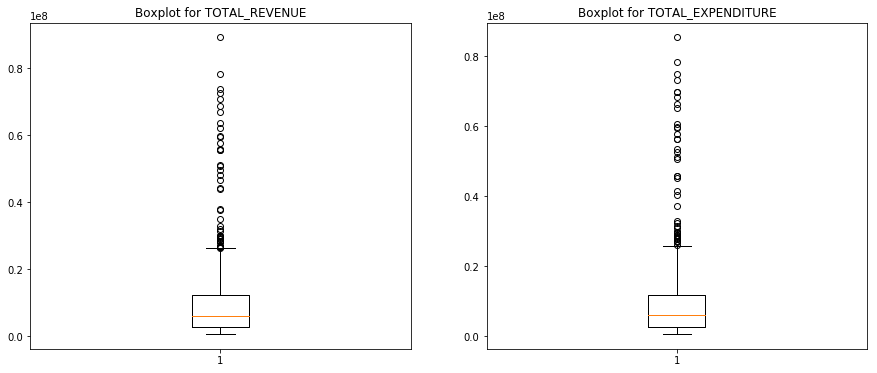

In [88]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.boxplot(usedu['TOTAL_REVENUE'])
plt.title("Boxplot for TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(usedu['TOTAL_EXPENDITURE'])
plt.title("Boxplot for TOTAL_EXPENDITURE")
plt.show()

Yes. Both variables have outliers.

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [95]:
from scipy.stats.mstats import winsorize
winsorized_Tot_Rev = winsorize(usedu['TOTAL_REVENUE'],(0,0.05))
winsorized_Tot_Exp = winsorize(usedu['TOTAL_EXPENDITURE'],(0,0.05))

In [96]:
usedu1 = usedu.copy()
usedu1['winsorized_Tot_Rev'] = winsorized_Tot_Rev
usedu1['winsorized_Tot_Exp'] = winsorized_Tot_Exp

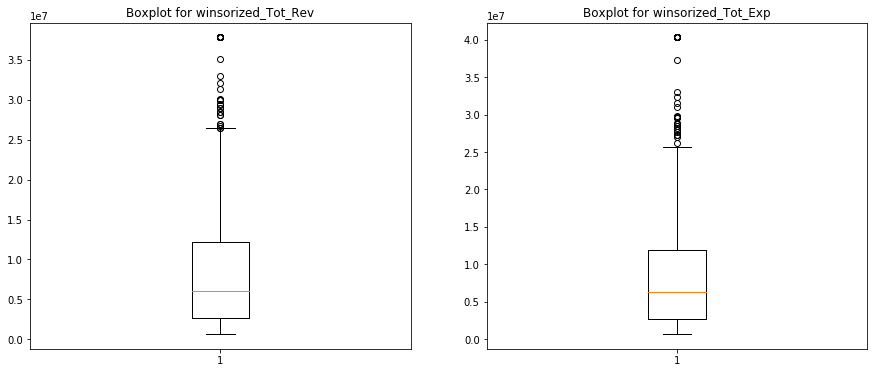

In [97]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.boxplot(usedu1['winsorized_Tot_Rev'])
plt.title("Boxplot for winsorized_Tot_Rev")

plt.subplot(1,2,2)
plt.boxplot(usedu1['winsorized_Tot_Exp'])
plt.title("Boxplot for winsorized_Tot_Exp")
plt.show()

In [57]:
usedu2 = usedu.copy()
usedu2['Budget_Deficit'] = usedu2['TOTAL_REVENUE'] - usedu2['TOTAL_EXPENDITURE']

Text(0.5, 1.0, 'Boxplot for Budget_Deficit')

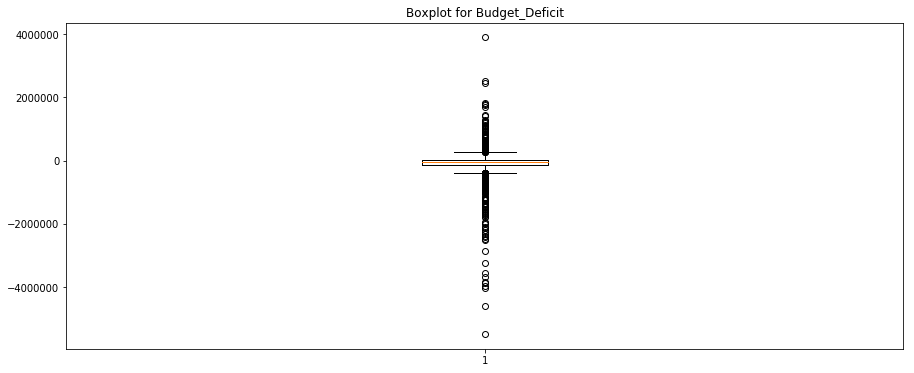

In [59]:
plt.figure(figsize=(15,6))
plt.boxplot(usedu2['Budget_Deficit'])
plt.title("Boxplot for Budget_Deficit")

In [76]:
winsorized_Bud_Def = winsorize(usedu2['Budget_Deficit'],(0.15,0.10))
usedu2['winsorized_Bud_Def'] = winsorized_Bud_Def

Text(0.5, 1.0, 'Boxplot for Winsorized Budget_Deficit')

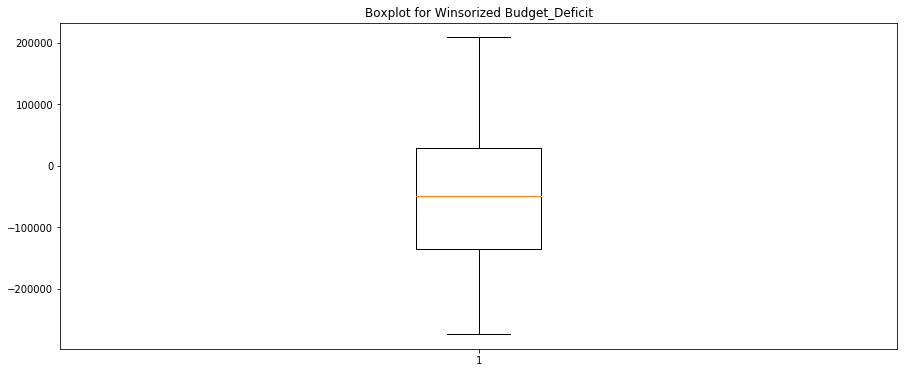

In [77]:
plt.figure(figsize=(15,6))
plt.boxplot(usedu2['winsorized_Bud_Def'])
plt.title("Boxplot for Winsorized Budget_Deficit")